# FantaHelp

Questo progetto è nato con lo scopo di aiutare tutti quei **fantallenatori** in preda al panico nella scelta del proprio attaccante.  
Spesso i giocatori, in alcune fasi della stagione, rendono più o meno di quanto ci si aspetti, andando a **over/under-performare** e rischiando di compromettere un'intera stagione.

L'obiettivo di questo software è supportare la scelta dei giocatori **senza basarsi unicamente sul numero di gol e assist**.  
Infatti, i dati presi in considerazione per la previsione finale includono **gol e assist attesi**, piuttosto che solo sul numero di reti segnate.

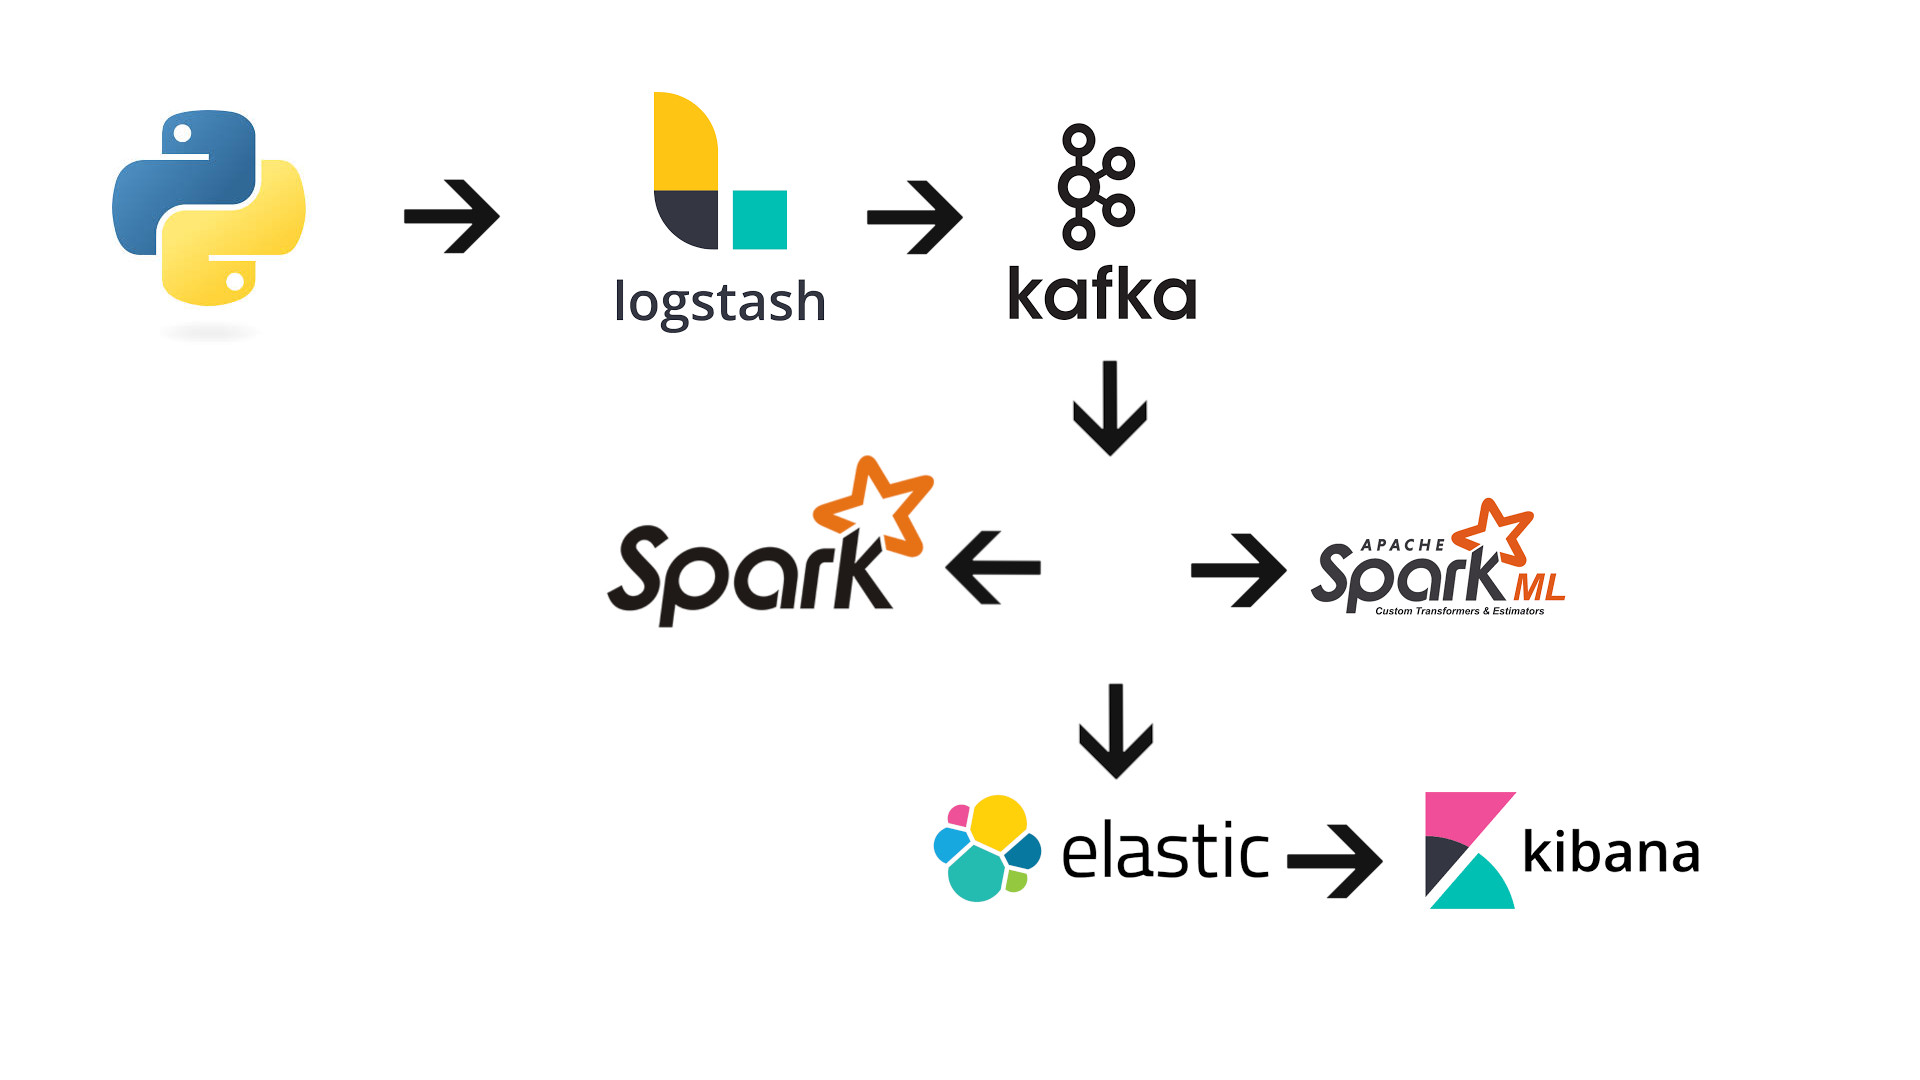

## Fase 1: Raccolta e Preprocessing dei Dati

I dati aggiornati sull'attuale stagione vengono ottenuti dal sito **Fbref**, che fornisce anche le statistiche utili per l'addestramento del modello.  
Una volta raccolti, i dati vengono puliti dai campi inutili attraverso **Logstash**, che provvede a inviarli a due diversi **topic Kafka**:

- Uno per i dati relativi alla **squadra di appartenenza**.
- Uno per i **giocatori** e le loro **statistiche**.

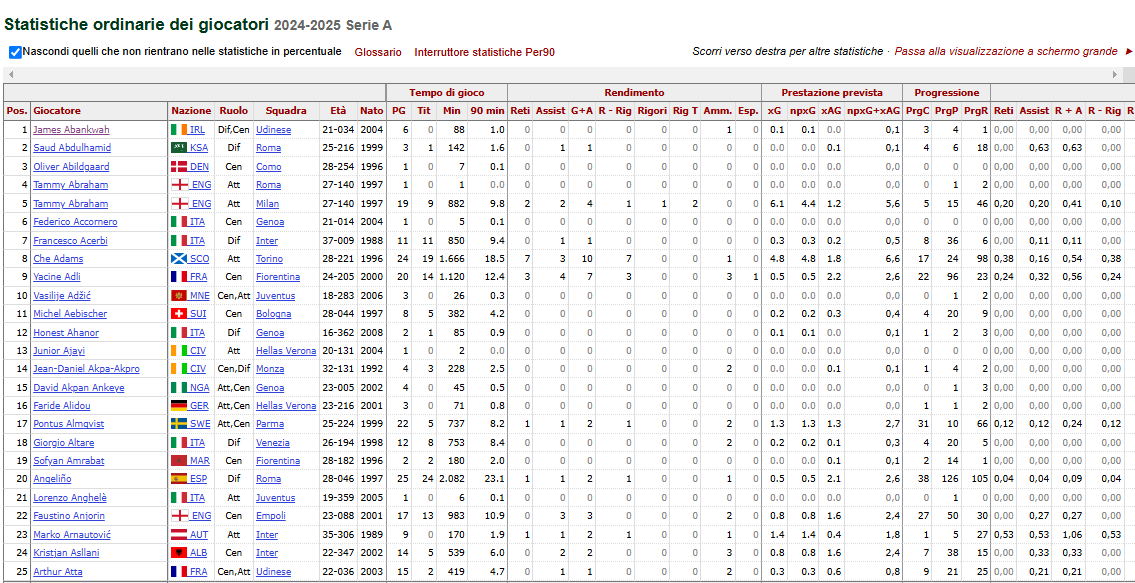

## Fase 2: Addestramento e Applicazione del Modello

Il cuore del progetto è basato su **Apache Spark** e **Spark ML**.  
Vengono addestrati due modelli di **regressione lineare**:
1. Uno per i **gol attesi**.
2. Uno per gli **assist attesi**.

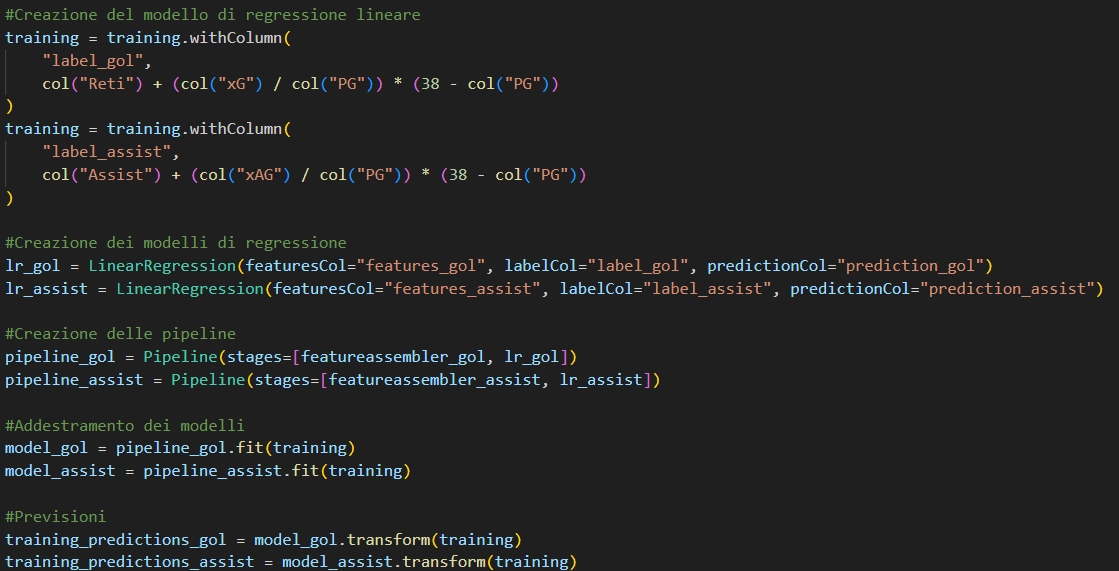

Una volta ottenuti i modelli allenati, questi vengono applicati ai dati ricevuti dai topic Kafka, aggiungendo così una colonna con la previsione dei **gol** e degli **assist attesi** per il finale di stagione.

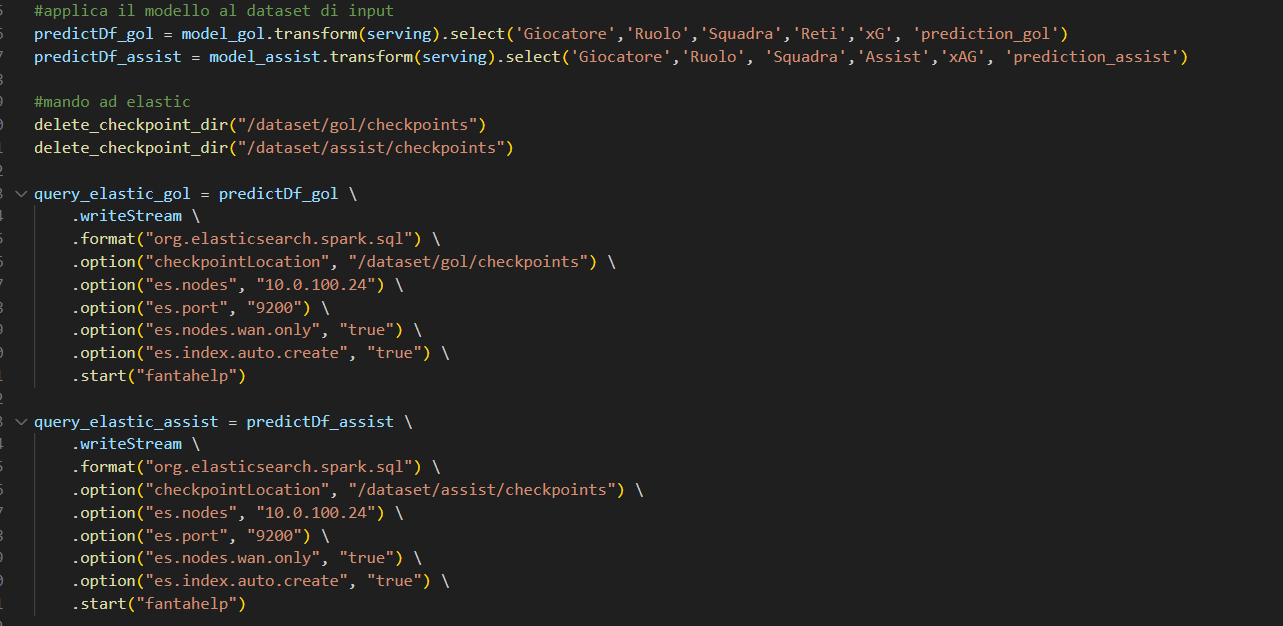

## Fase 3: Visualizzazione e Analisi

I dataframe risultanti vengono inviati al topic **"fantahelp"** su **Elasticsearch**, in modo da garantirne la visualizzazione tramite una dashboard **Kibana**.  
La dashboard Kibana presenta due **grafici a barre**, che mostrano:

- I **10 migliori marcatori previsti** a fine stagione.
- I **10 migliori assist-man previsti** a fine stagione.

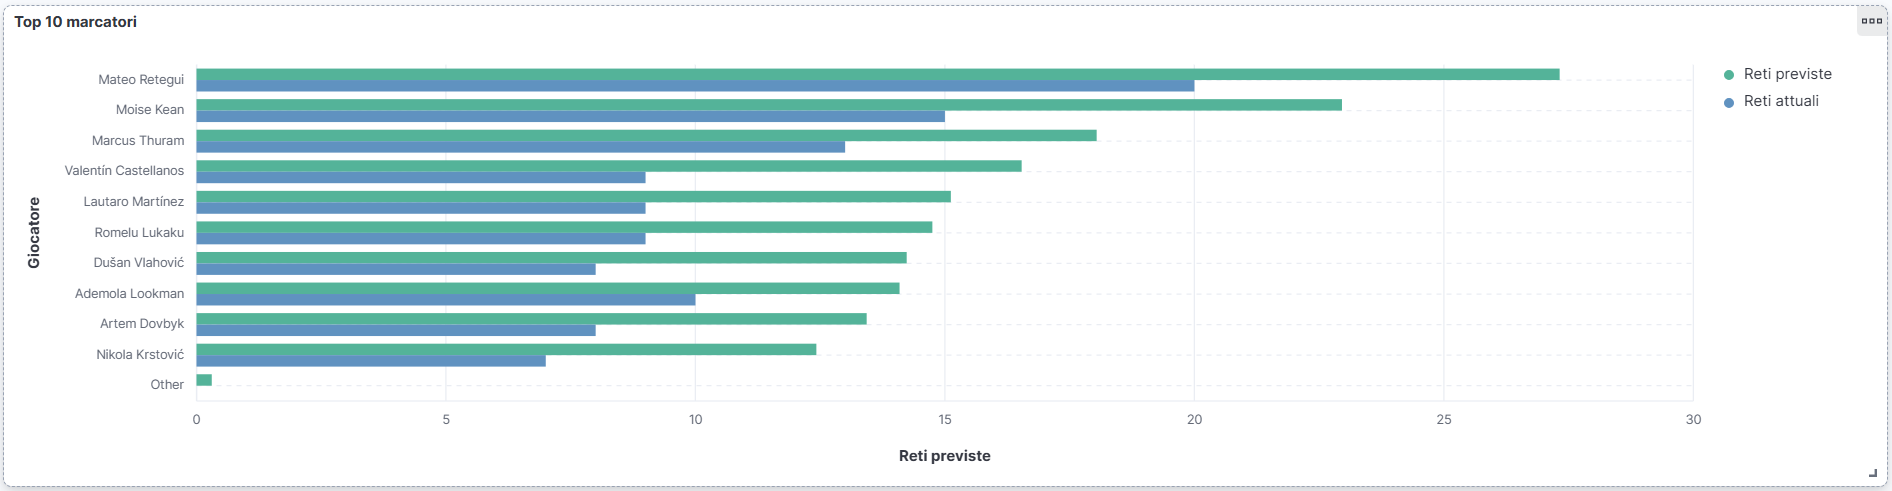

Questo aiuterà il **fantallenatore** a fare scelte più consapevoli, evitando di basarsi unicamente sui dati storici di gol e assist.

## Scelte Tecniche

FantaHelp utilizza una serie di tecnologie avanzate per garantire una gestione efficace dei dati, l'addestramento accurato dei modelli e una visualizzazione chiara dei risultati. Le scelte principali includono:

### 1. **Logstash**
Logstash è stato scelto come sistema di ingestion dei dati per la sua capacità di raccogtrare e inviare i dati ai vari componenti della pipeline. Questo strumgaramtiscetendo una rapida integrazione con Kafka e Apache Spark. Inoltre, Logstash permette di eseguire trasformazioni avanzate sui dati, assicurando che arrivino nel formato corretto per l'elaborazione successiva.

### 2. **Kafka**
Kafka è il broker di messaggi scelto per il progetto grazie alla silità e affidabilità nella gestione di flussi di dati in tempo reale. Con Kafka, i dati vengono inviati in modo sicuro e consistente da un componente all'altro nella pipeline, garantendo che l'elaborazione dei dati sia efficiente e che non ci siano perdite durante la trasmissione.

### 3. **Apache Spark**
Apache Spark è stato selezionato come motore di elaborazione dati per le sue capacità avanzate nel trattamento di grandi volumi di informazioni in tein-memory, Spark permette di eseguire analisi veloci e parallele sui dati ricevuti da Kafka, velocizzando l'addestramento dei modelli di previsione e l'analisi dei risultati.

### 4. **Elasticsearch**
Elasticsearch è stato scelto per l'indicizzazione e la ricerca dei dati grua velocità e capacità dsu larga scala. Questo strumento consente di archiviare i risultati delle previsioni in un formato facilmente ricercabile, rendendo possibile una consultazione rapida e scalabile dei dati elaborati.

### 5. **Kibana**
Kibana è stato integrato come strumento di visualizzazione per esplorare e analizzare i dati contenuti in Elasticsearch. Grazie alla sua interfaccia grafica intuitiva, Kibana permette di generare dashboard interattive e report visivi che aiutano i fantallenatori a interpretare i dati e prendere decisioni più informate sulle performane dei giocatori.
i durante la stagione.

